In [1]:
import urllib.request
import json
import pandas as pd
from pandas.io.json import json_normalize
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

key = '4263575945776f6c3130356a6d556b53'
start_date = date(2021,1,1)
columns_name = (['USE_MON', 'LINE_NUM', 'SUB_STA_NM', 'PAY_RIDE_NUM', 'FREE_RIDE_NUM',
       'PAY_ALIGHT_NUM', 'FREE_ALIGHT_NUM', 'WORK_DT'])
final_data = pd.DataFrame(columns = columns_name ) # 데이터프레임 생성 - 컬럼명 맞추기

for i in range(1, 13):
    target_date = start_date.strftime('%Y%m')
    url = 'http://openapi.seoul.go.kr:8088/%s/json/CardSubwayPayFree/1/1000/%s/'%(key, target_date )
    
    result = urllib.request.urlopen(url)
    
    json_raw_data = result.read()
    json_utf8 = json_raw_data.decode('utf-8')
    json_complete = json.loads(json_utf8)
    
    monthly_plus_data = pd.DataFrame(json_complete['CardSubwayPayFree']['row'])
    final_data = pd.concat([final_data, monthly_plus_data])
    
    plus_month = relativedelta(months=1) # 월 더하기
    start_date = start_date + plus_month
    
    
final_data


,USE_MON,LINE_NUM,SUB_STA_NM,PAY_RIDE_NUM,FREE_RIDE_NUM,PAY_ALIGHT_NUM,FREE_ALIGHT_NUM,WORK_DT
0,202101,1호선,신설동,219283.0,82995.0,218343.0,79139.0,20210203
1,202101,1호선,시청,371942.0,46231.0,366139.0,43433.0,20210203
2,202101,1호선,청량리(서울시립대입구),266539.0,205089.0,264050.0,206452.0,20210203
3,202101,1호선,종각,598363.0,84544.0,567563.0,78565.0,20210203
4,202101,1호선,동묘앞,98645.0,113919.0,105308.0,115644.0,20210203
...,...,...,...,...,...,...,...,...
604,202112,중앙선,도농,226955.0,53170.0,204211.0,51107.0,20220103
605,202112,중앙선,지평,866.0,793.0,1086.0,723.0,20220103
606,202112,중앙선,상봉(시외버스터미널),126865.0,33906.0,126417.0,32759.0,20220103
607,202112,중앙선,망우,150511.0,59433.0,147014.0,61454.0,20220103


In [2]:
final_data.drop(columns =['SUB_STA_NM','PAY_RIDE_NUM','PAY_ALIGHT_NUM','FREE_ALIGHT_NUM','WORK_DT'], inplace=True)

In [20]:
free_ride = final_data.groupby('LINE_NUM')[['FREE_RIDE_NUM']].sum()
free_ride.sort_values(by = 'FREE_RIDE_NUM', axis=0, ascending=True, inplace = True)
free_ride

,FREE_RIDE_NUM
LINE_NUM,
장항선,900598.0
경강선,1334662.0
공항철도 1호선,2534136.0
경춘선,3232163.0
수인선,3572219.0
9호선2~3단계,3793271.0
과천선,4451656.0
우이신설선,4477277.0
안산선,5177631.0


In [21]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

Text(0, 0.5, '무임승차건')

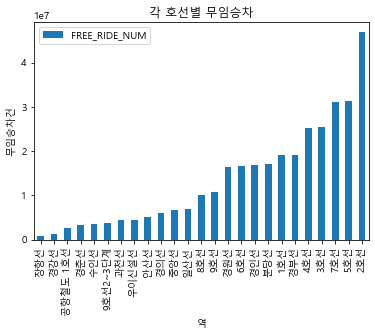

In [23]:
free_ride.plot(kind = 'bar')
plt.title('각 호선별 무임승차')
plt.xlabel('역')
plt.ylabel('무임승차건')



Text(0, 0.5, '무임승차건')

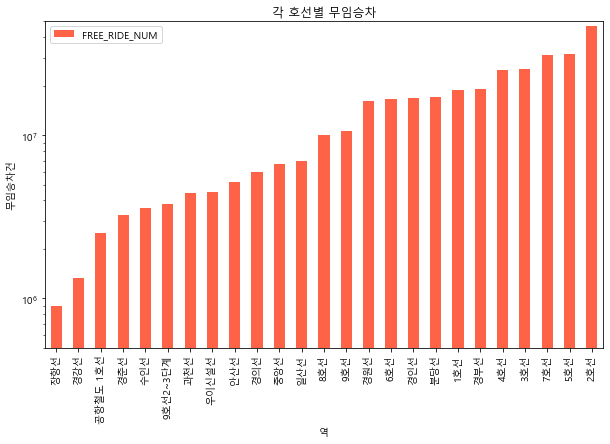

In [37]:
free_ride.plot(logy = True, ylim=(500000, 50000000), kind = 'bar', figsize = (10, 6), color = 'tomato')
plt.title('각 호선별 무임승차')
plt.xlabel('역')
plt.ylabel('무임승차건')